Stock Analysis 

(Based on yfinance project: https://pypi.org/project/yfinance/) 

- Single Stock Analysis 
- Comparison of two stocks 
- Comparison of multiple stocks and returns 

In [150]:
#Library imports 
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt 
from datetime import date


Analysis of Single Stock 
-  Information about the stock 
- Graph of price evolution 
- Check returns based on purchase and period

In [185]:
#Checking a single stock data
ticker = "AZUL4.SA"
stock = yf.Ticker(ticker)



In [6]:
#stock info 
stock.info 

In [186]:
#historical data 
 # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max (Or start= and end=)
hist = stock.history(period="max") #returns maximum periods to be later filtered and analysed. 
hist.reset_index(inplace=True)
hist.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-04-11,21.809999,22.980000,21.770000,22.400000,13060500,0,0
1,2017-04-12,22.450001,22.990000,22.299999,22.959999,1745900,0,0
2,2017-04-13,22.969999,23.010000,22.549999,22.990000,549600,0,0
3,2017-04-17,23.000000,23.000000,22.620001,22.850000,249300,0,0
4,2017-04-18,22.820000,24.790001,22.600000,23.910000,1125100,0,0


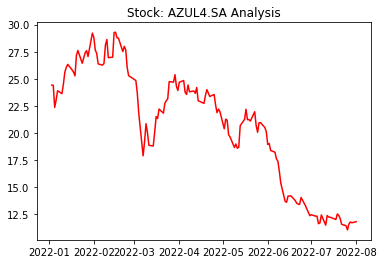

Highest close date: 2022-02-16 00:00:00 with a value of: 29.29
Lowest close date: 2022-07-26 00:00:00 with a value of: 11.07


In [187]:
#Close price Graph based on date  
start_date = '2022-01-01' #Date YYYY-MM-DD
end_date = '2022-08-01' #Date  YYYY-MM-DD

df = hist[(hist["Date"] >= start_date) & (hist["Date"] <= end_date)]
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(df["Date"],df["Close"],color='r')
ax1.set_title(f"Stock: {ticker} Analysis")
plt.show()

#returns the date with the highest and lowest close price. 
close_max_date = df[df["Close"] == df["Close"].max()]["Date"].iloc[0]
close_max_value = df[df["Close"] == df["Close"].max()]["Close"].iloc[0]
close_min_date = df[df["Close"] == df["Close"].min()]["Date"].iloc[0]
close_min_value = df[df["Close"] == df["Close"].min()]["Close"].iloc[0]
print(f"Highest close date: {close_max_date} with a value of: {round(close_max_value,2)}")
print(f"Lowest close date: {close_min_date} with a value of: {round(close_min_value,2)}")

In [183]:
#Function to calculate the return of investiment based on date 

def result_of_investment(total_amount_purchased,purchased_value,sold_value):
    return (sold_value * total_amount_purchased)/ purchased_value

#function to calculate percentage gain or loss 
def percentage_result(purchased_value,sold_value):
    return (sold_value-purchased_value)/purchased_value


In [111]:
#Return Analysis (Considering close price not an exact hour)
#inform date purchased, date sold and total amount ($) purchased 
date_purchased = "2020-01-10"
date_sold = "2022-06-08" 
total_amount_purchased = 10000
#-------------------------------------------------------------------
#calculations and return 
try:
    purchased_value = hist[hist["Date"] == date_purchased]["Close"].iloc[0]
    sold_value = hist[hist["Date"] == date_sold]["Close"].iloc[0]
    result_investiments = result_of_investment(total_amount_purchased,purchased_value,sold_value)
    result_percentage = percentage_result(purchased_value,sold_value)
    print(f"Your initial purchase was of: {round(total_amount_purchased,2)}, with a withdrall of: {round(result_investiments,2)}, with a {'Loss' if result_percentage <0 else 'Gain'} of: {round(result_percentage * 100,2)}%")
except:
    print("No Value avaible for the date informed (Market possible closed)")

Your initial purchase was of: 10000, with a withdrall of: 2549, with a Loss of: -75%


In [188]:
#Return of the stock today

day_purchased = '2022-01-10'
total_purchased = 1000
#---------------------------------------------
today_value = hist[hist["Date"] == hist["Date"].max()]["Close"].iloc[0] #Consider last day on the history 
purchased_value = hist[hist["Date"] == date_purchased]["Close"].iloc[0]
result_investment = result_of_investment(total_purchased,purchased_value,today_value)
result_percentage = percentage_result(purchased_value,today_value)
print(f"You investiment today has the following value: {round(result_investment,2)}")
print(f"It is a  {'Loss' if result_percentage <0 else 'Gain'} of: {round(result_percentage *100,2)}%")

You investiment today has the following value: 301.74
It is a  Loss of: -69.83%


Comparison of Two Stocks 
- Information about the stocks 
- Graph of price evolution between the two stocks  
- Check returns based on purchase and period of the two stocks 

In [135]:
#Inform both stocks to compare 
ticker1 = "ROMI3.SA" #stock 1 to compare 
ticker2 = "ITSA4.SA" #stock 2 to compare 
stock1 = yf.Ticker(ticker1)
stock2 = yf.Ticker(ticker2)

hist1 = stock1.history(period="max") #returns maximum periods to be later filtered and analysed. 
hist1.reset_index(inplace=True)
#hist1.head()

hist2 = stock2.history(period="max") #returns maximum periods to be later filtered and analysed. 
hist2.reset_index(inplace=True)
#hist2.head()

        Date      Open      High       Low     Close   Volume  Dividends  \
0 2000-01-03  0.295567  0.295567  0.295567  0.295567  1260000        0.0   
1 2000-01-04  0.286700  0.286700  0.286472  0.286472   186666        0.0   
2 2000-01-05  0.279652  0.288746  0.272831  0.288746  3640001        0.0   
3 2000-01-06  0.227359  0.227359  0.227359  0.227359   140000        0.0   
4 2000-01-07  0.227359  0.227359  0.227359  0.227359        0        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
        Date      Open      High       Low     Close      Volume  Dividends  \
0 2000-01-03  0.503678  0.565628  0.500985  0.536000  10799362.0        0.0   
1 2000-01-04  0.517146  0.517146  0.484824  0.484824  12675326.0        0.0   
2 2000-01-05  0.487518  0.525226  0.468664  0.525226   9621184.0        0.0   
3 2000-01-06  0.522533  0.536000  0.519839  0.533307  24240133.0        0.0   
4 2000-01-07  0.538693  0.546774  0.5252

<Figure size 432x288 with 0 Axes>

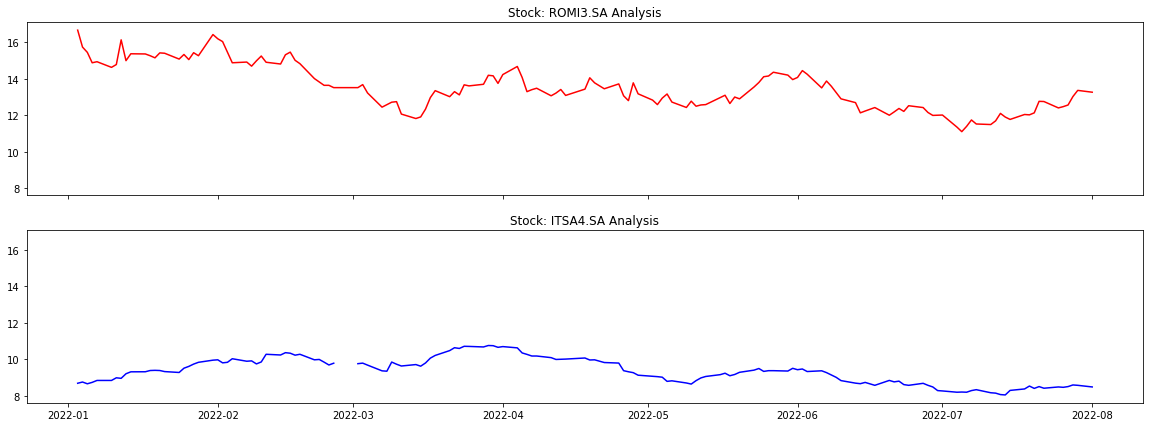

The Ticker:ROMI3.SA information:
Highest close date: 2022-01-03 00:00:00 with a value of: 16.66
Lowest close date: 2022-07-05 00:00:00 with a value of: 11.1
The Ticker:ITSA4.SA information:
Highest close date: 2022-03-29 00:00:00 with a value of: 10.76
Lowest close date: 2022-07-14 00:00:00 with a value of: 8.05


In [134]:
#Combined Graph of the two stocks 
start_date = '2022-01-01' #Date YYYY-MM-DD
end_date = '2022-08-01' #Date  YYYY-MM-DD

df1 = hist1[(hist1["Date"] >= start_date) & (hist1["Date"] <= end_date)]
df2 = hist2[(hist2["Date"] >= start_date) & (hist2["Date"] <= end_date)]

fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(2, sharex=True,sharey=True,figsize=(20,7))

ax1.plot(df1["Date"],df1["Close"],color='r')
ax1.set_title(f"Stock: {ticker1} Analysis")

ax2.plot(df2["Date"],df2["Close"],color='b')
ax2.set_title(f"Stock: {ticker2} Analysis")
plt.show()

#returns the date with the highest and lowest close price. 
close_max_date1 = df1[df1["Close"] == df1["Close"].max()]["Date"].iloc[0]
close_max_value1 = df1[df1["Close"] == df1["Close"].max()]["Close"].iloc[0]
close_min_date1 = df1[df1["Close"] == df1["Close"].min()]["Date"].iloc[0]
close_min_value1 = df1[df1["Close"] == df1["Close"].min()]["Close"].iloc[0]

print(f"The Ticker:{ticker1} information:")
print(f"Highest close date: {close_max_date1} with a value of: {round(close_max_value1,2)}")
print(f"Lowest close date: {close_min_date1} with a value of: {round(close_min_value1,2)}")

close_max_date2 = df2[df2["Close"] == df2["Close"].max()]["Date"].iloc[0]
close_max_value2 = df2[df2["Close"] == df2["Close"].max()]["Close"].iloc[0]
close_min_date2 = df2[df2["Close"] == df2["Close"].min()]["Date"].iloc[0]
close_min_value2 = df2[df2["Close"] == df2["Close"].min()]["Close"].iloc[0]

print(f"The Ticker:{ticker2} information:")
print(f"Highest close date: {close_max_date2} with a value of: {round(close_max_value2,2)}")
print(f"Lowest close date: {close_min_date2} with a value of: {round(close_min_value2,2)}")

In [148]:
#Compare wallet results for the two stocks for the returns 
date_purchased_stock1 = "2019-01-11"
date_sold_stock1 = "2022-06-10" 
total_amount_purchased_stock1 = 10000

date_purchased_stock2 = "2021-01-19"
date_sold_stock2 = "2022-06-14" 
total_amount_purchased_stock2 = 10000

#calculations and return for stock1 
try:
    purchased_value_stock1 = hist1[hist1["Date"] == date_purchased_stock1]["Close"].iloc[0]
    sold_value_stock1 = hist1[hist1["Date"] == date_sold_stock1]["Close"].iloc[0]
    result_investiments_stock1 = result_of_investment(total_amount_purchased_stock1,purchased_value_stock1,sold_value_stock1)
    result_percentage_stock1 = percentage_result(purchased_value_stock1,sold_value_stock1)
    print(f"Your initial ({ticker1}) purchase was of: {round(total_amount_purchased_stock1,2)}, with a withdrall of: {round(result_investiments_stock1,2)}, with a {'Loss' if result_percentage_stock1 <0 else 'Gain'} of: {round(result_percentage_stock1 * 100,2)}%")

    purchased_value_stock2 = hist2[hist2["Date"] == date_purchased_stock2]["Close"].iloc[0]
    sold_value_stock2 = hist2[hist2["Date"] == date_sold_stock2]["Close"].iloc[0]
    result_investiments_stock2 = result_of_investment(total_amount_purchased_stock2,purchased_value_stock2,sold_value_stock2)
    result_percentage_stock2 = percentage_result(purchased_value_stock2,sold_value_stock2)
    print(f"Your initial purchase ({ticker2}) was of: {round(total_amount_purchased_stock2,2)}, with a withdrall of: {round(result_investiments_stock2,2)}, with a {'Loss' if result_percentage_stock2 <0 else 'Gain'} of: {round(result_percentage_stock2 * 100,2)}%")
    print(f"Your initial Investiment was: {round(total_amount_purchased_stock1 + total_amount_purchased_stock2,2)} with a {'Loss' if result_percentage_stock1 + result_percentage_stock2 <0 else 'Gain'} of: {round(result_percentage_stock1 + result_percentage_stock2,2)}% resulting in a final total of: {round(result_investiments_stock1 + result_investiments_stock2,2)}")
except:
    print("No Value avaible for the date informed (Market possible closed)")


Your initial (ROMI3.SA) purchase was of: 10000, with a withdrall of: 25571.82, with a Gain of: 155.72%
Your initial purchase (ITSA4.SA) was of: 10000, with a withdrall of: 8608.02, with a Loss of: -13.92%
Your initial Investiment was: 20000 with a Gain of: 1.42% resulting in a final total of: 34179.84


Comparison of Multiple Stocks
- Information about the stocks 
- Graph of price evolution between the stocks (gains and losses)
- Check returns based on purchase and period of the analyzed stocks 